<a href="https://colab.research.google.com/github/JeanMichelDeveloper/Training/blob/main/Restore_a_damaged_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install opencv
!pip install opencv-contrib-python==4.6.0.66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import necessary libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy

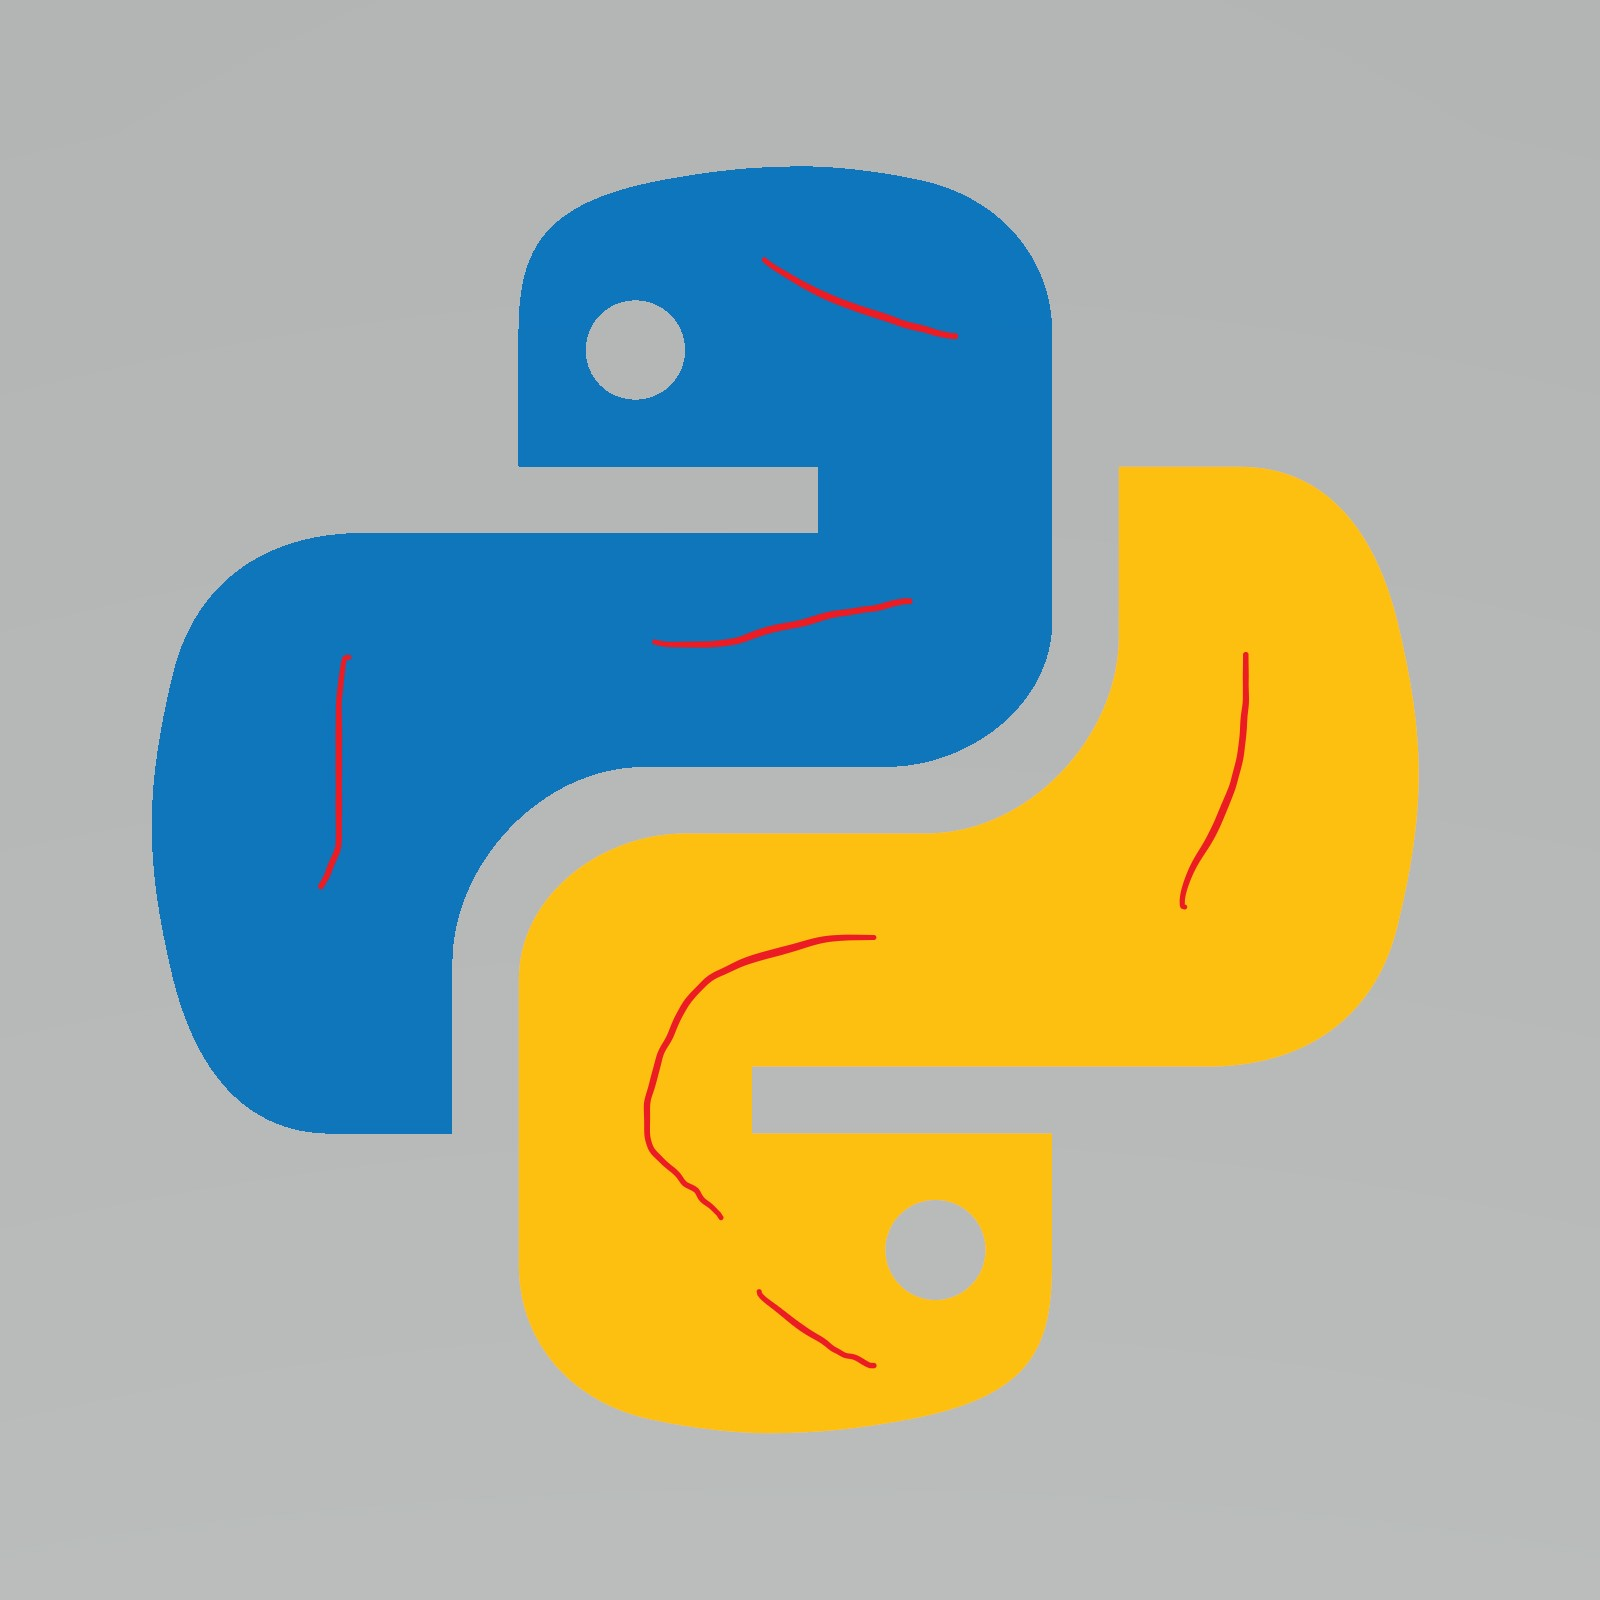

In [3]:
#load damaged image
damaged = cv2.imread("Damaged.jpg")

cv2_imshow(damaged)

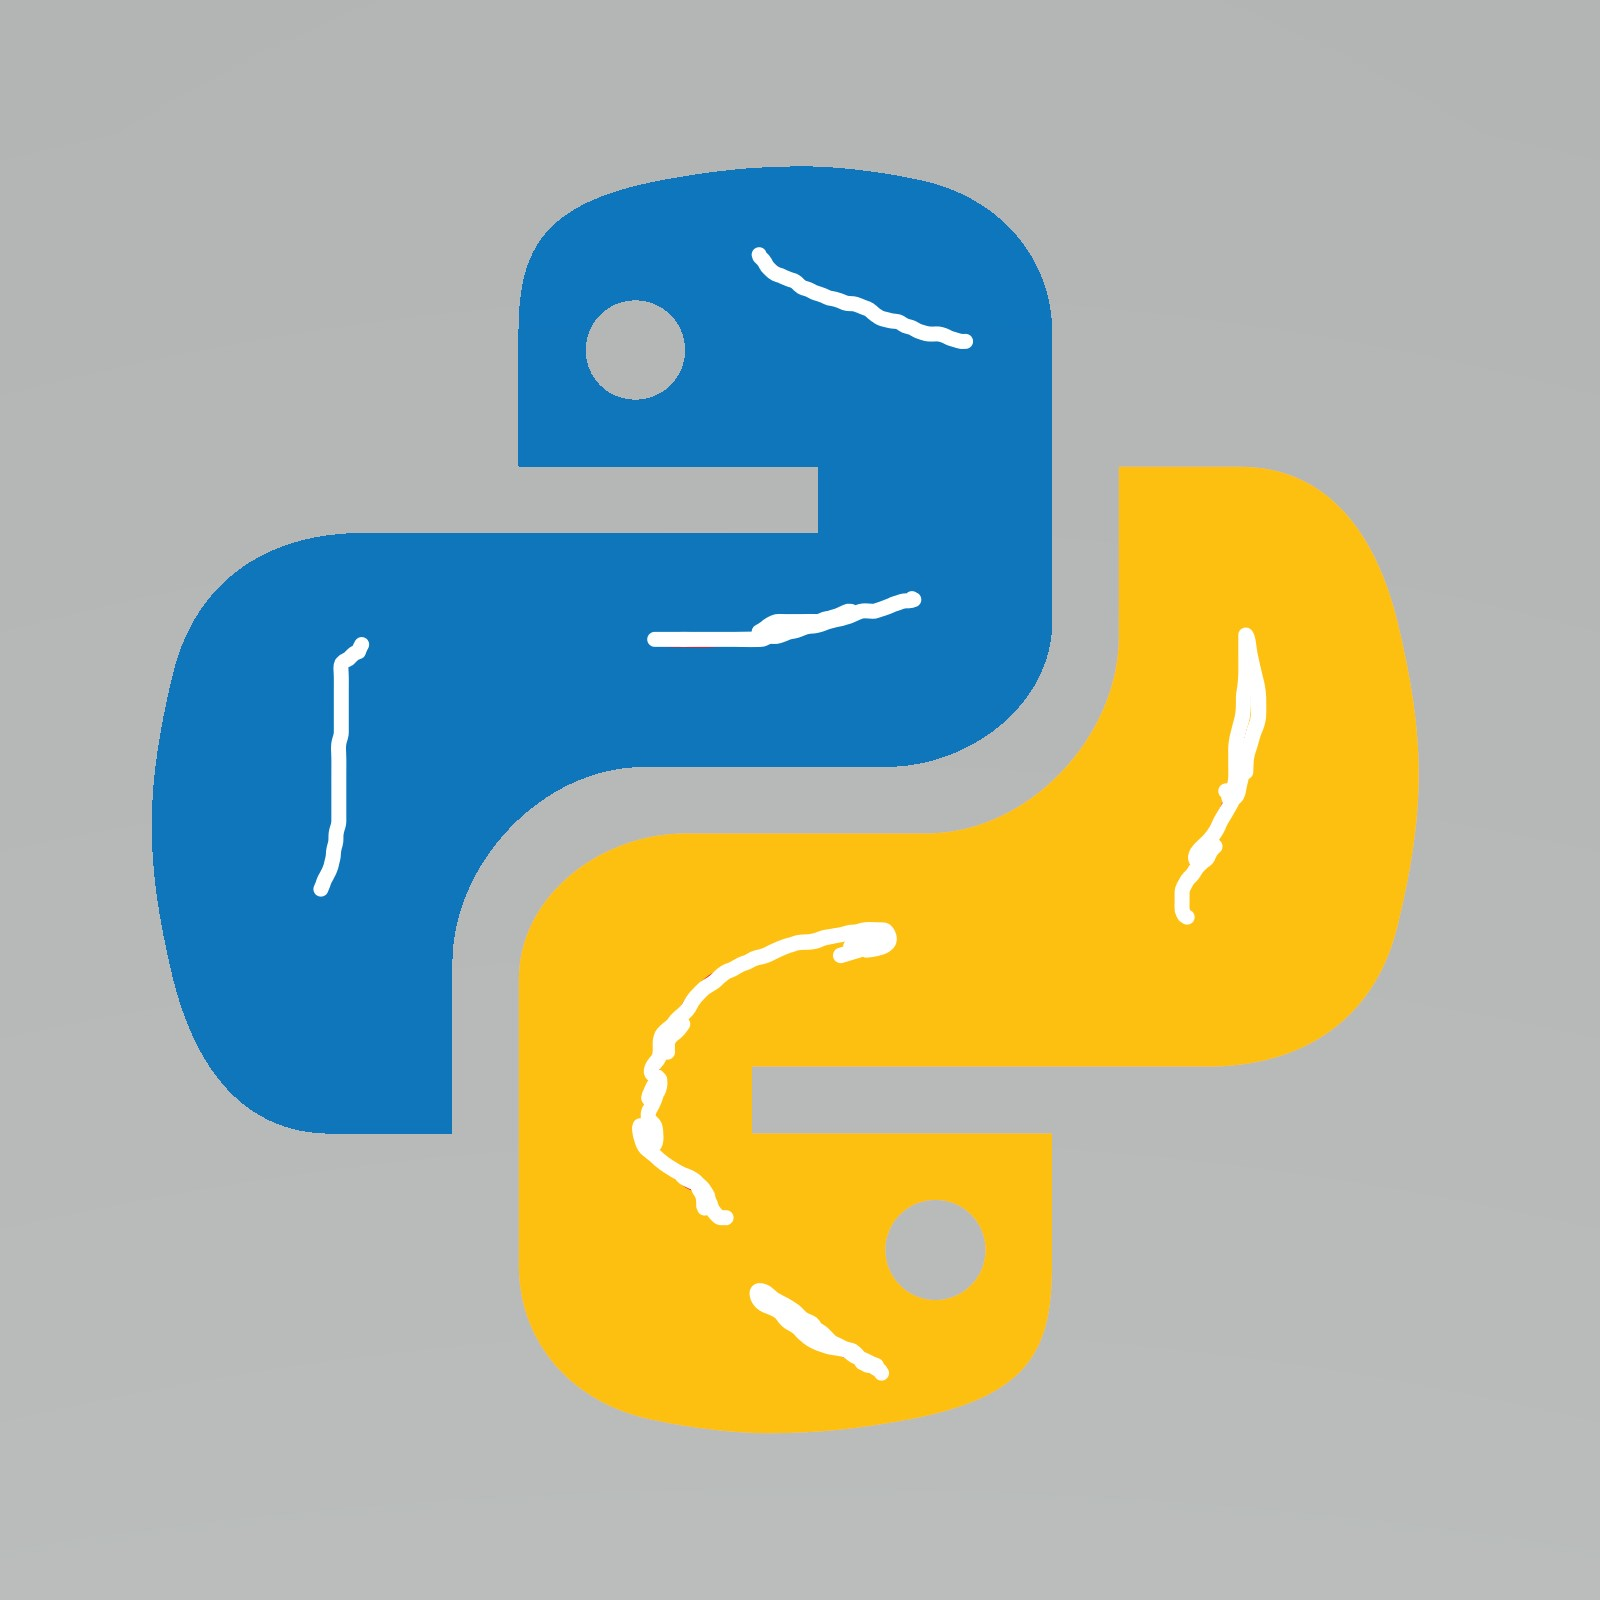

In [4]:
#load mask
damaged_mask = cv2.imread("DamagedMask.jpg")

cv2_imshow(damaged_mask)

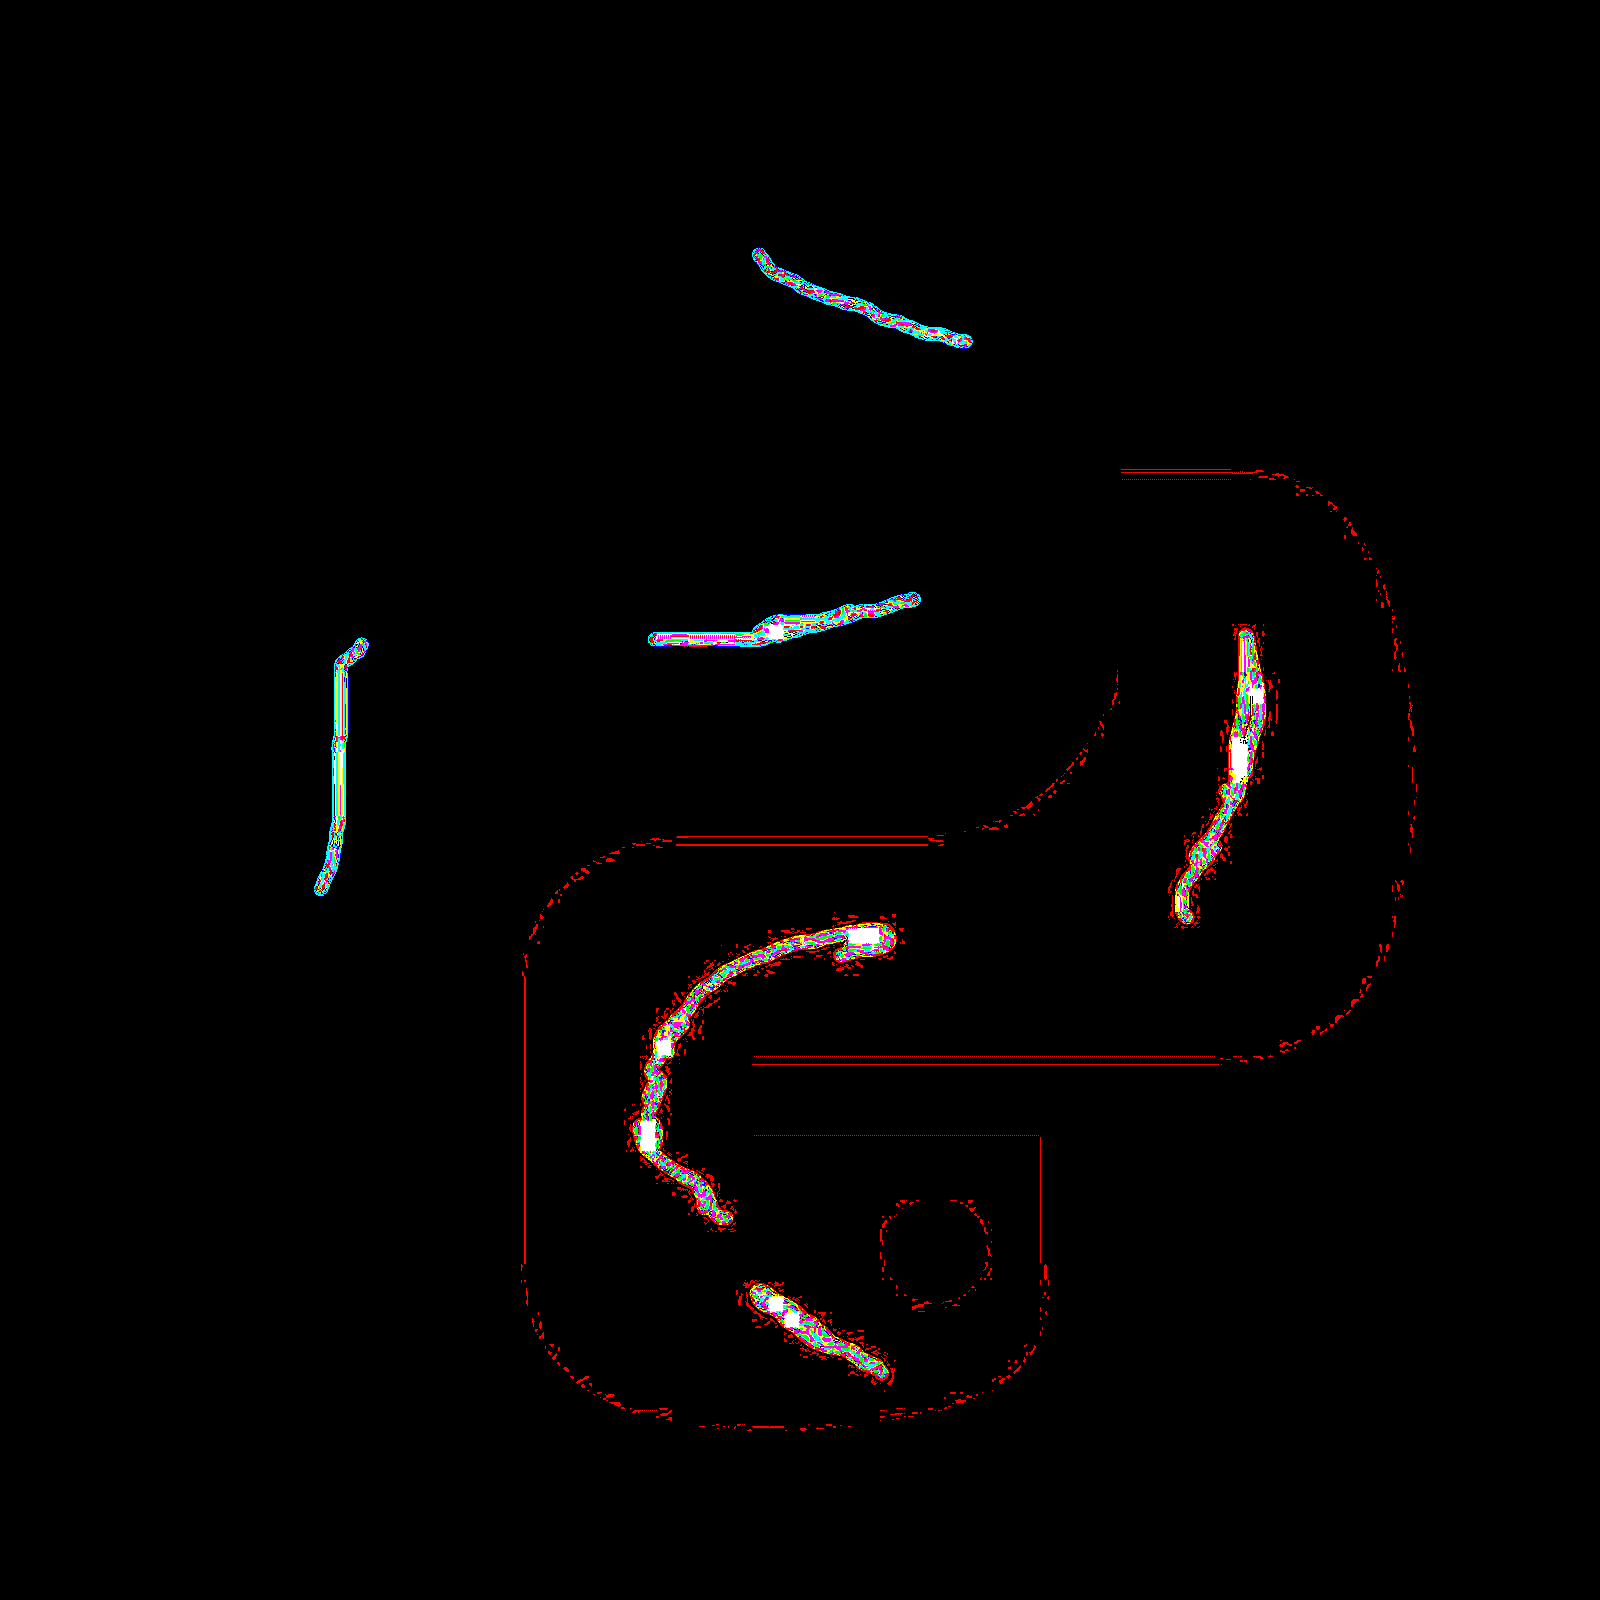

In [5]:
#detect white
threshold_value = 254

output_value = 255

ret, thresh = cv2.threshold(damaged_mask, 
              threshold_value,
              output_value,
              cv2.THRESH_BINARY)

cv2_imshow(thresh)

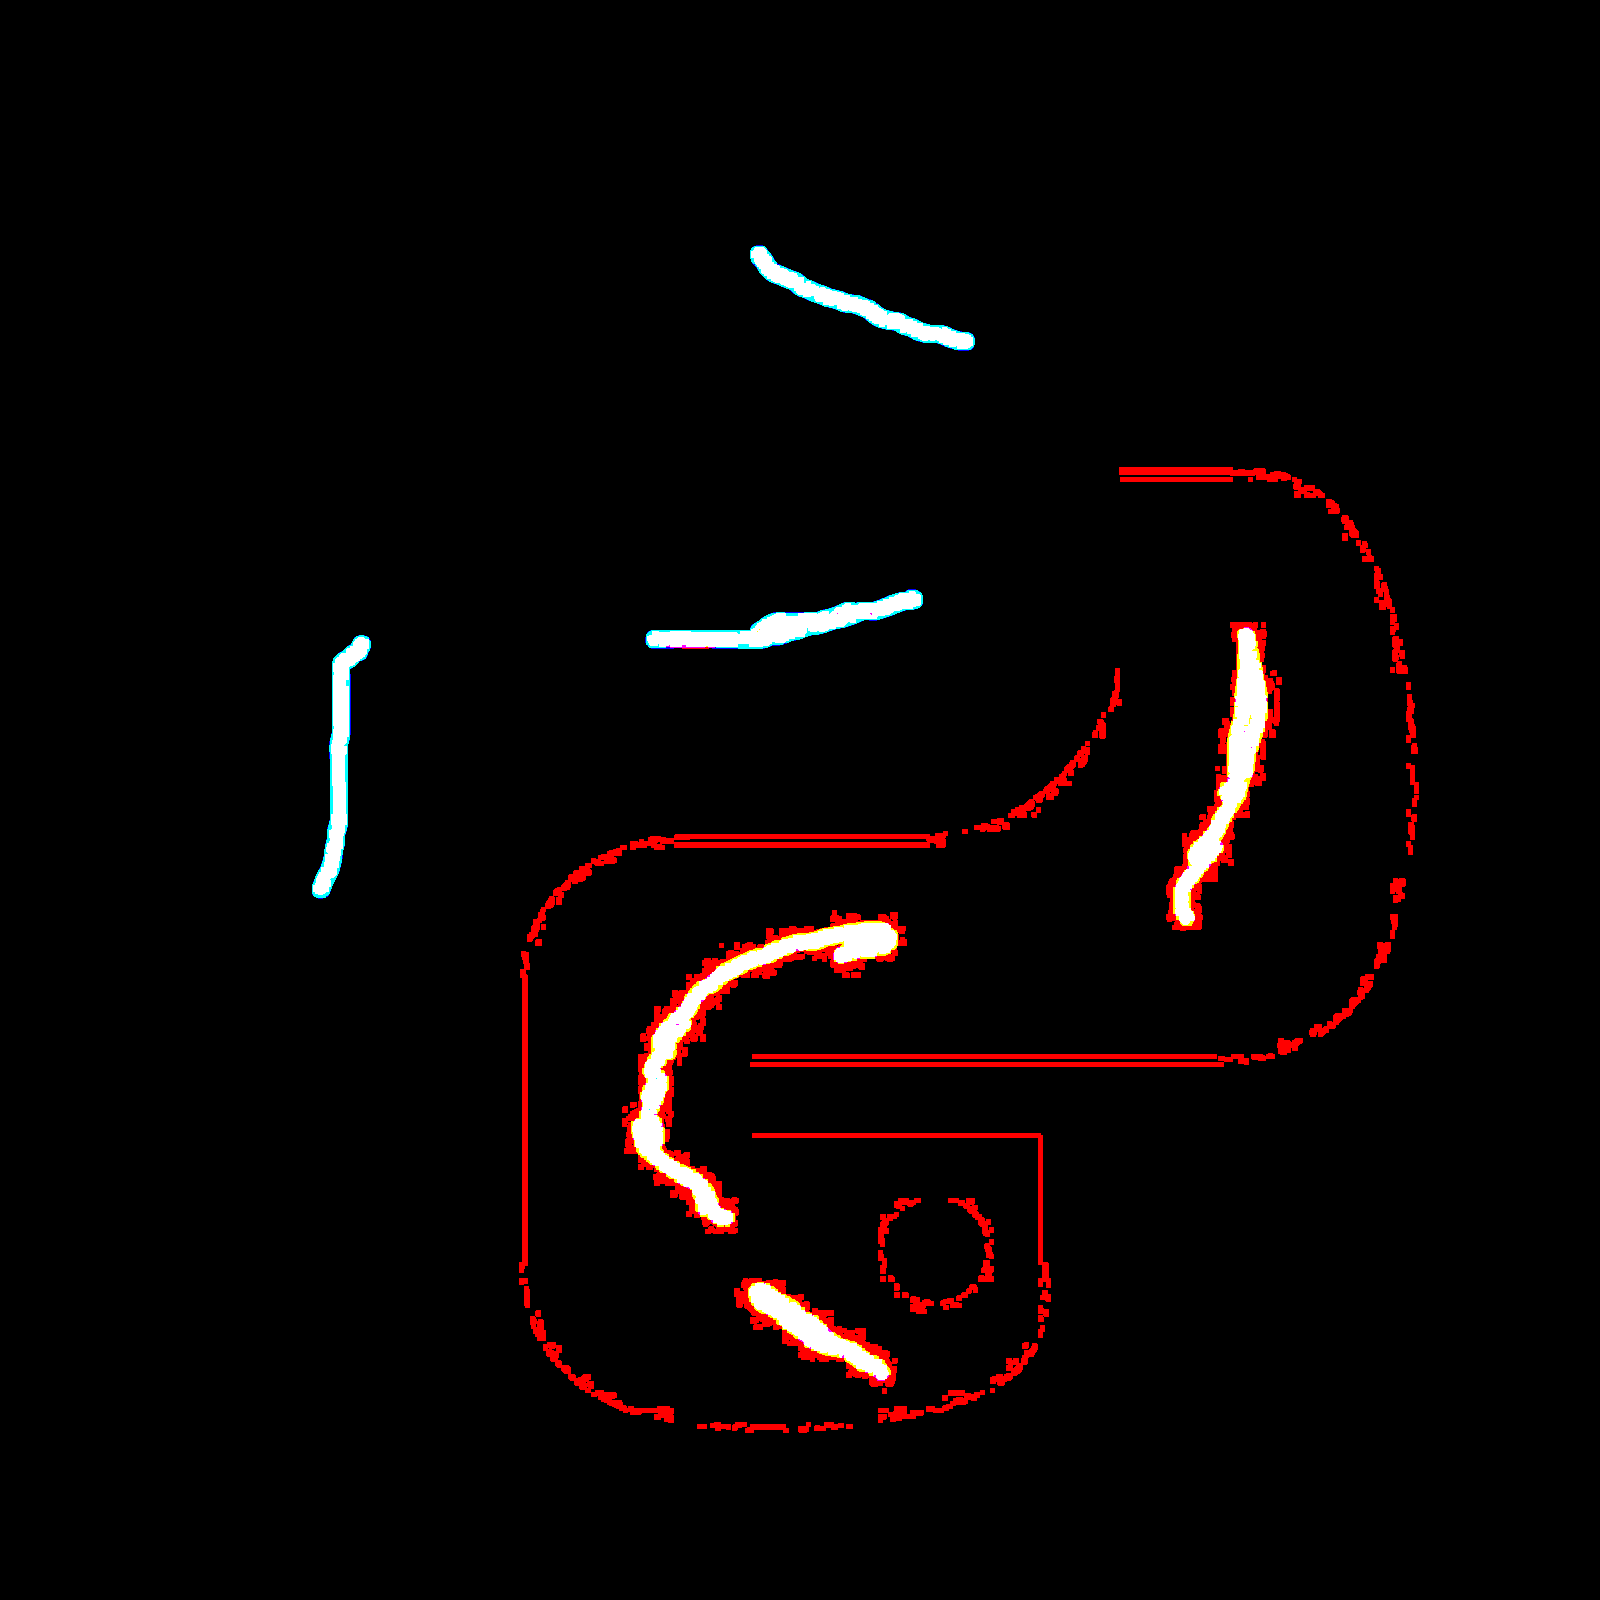

In [14]:
#dilate image

kernel = numpy.ones((5,5), numpy.uint8)

mask = cv2.dilate(thresh, kernel, iterations = 1)

cv2_imshow(mask)

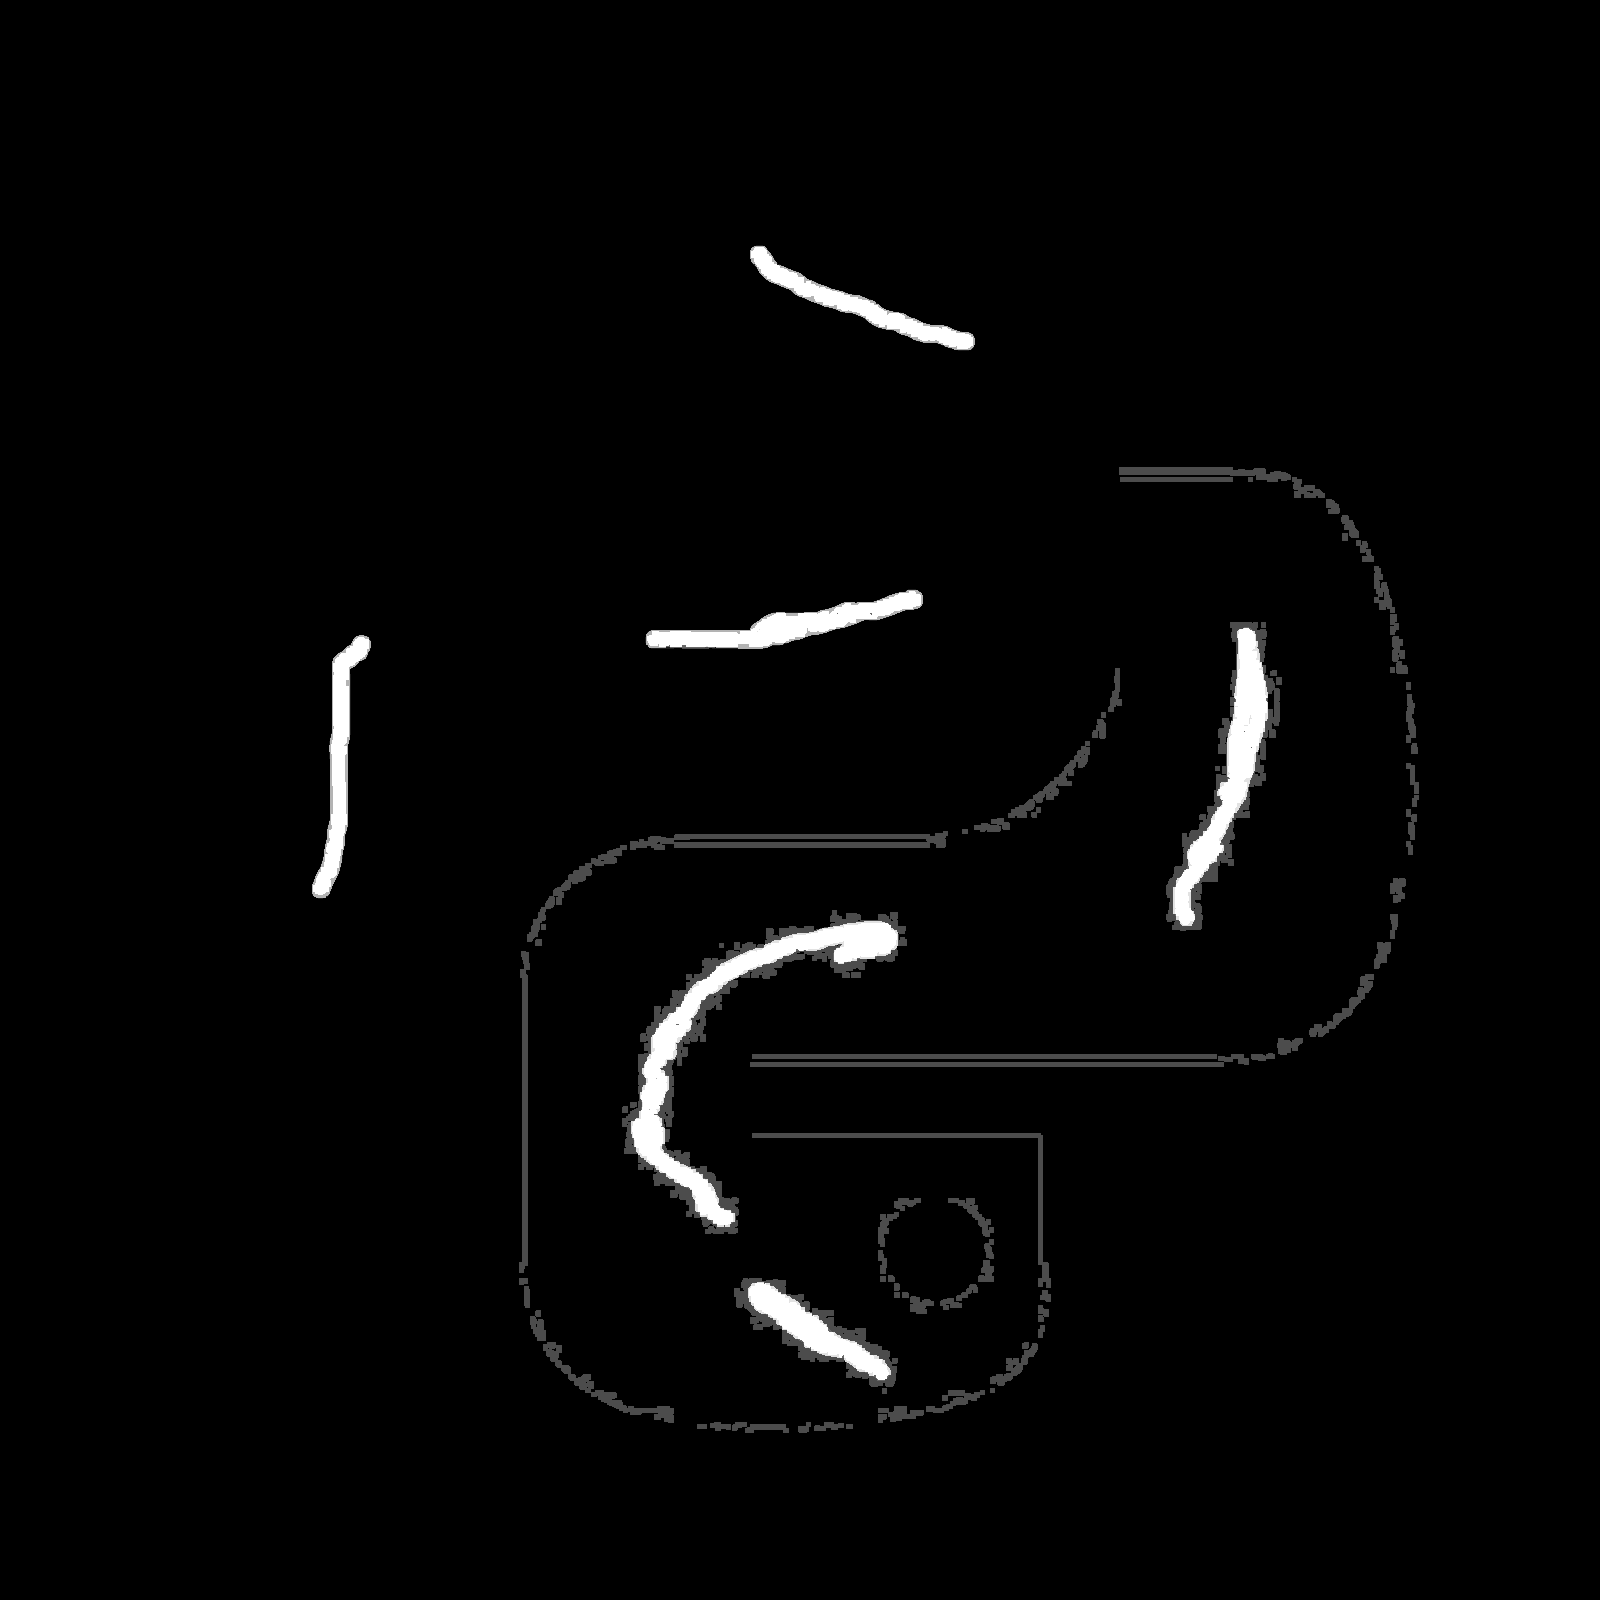

In [15]:
#convert mask to gray scale
gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_mask)

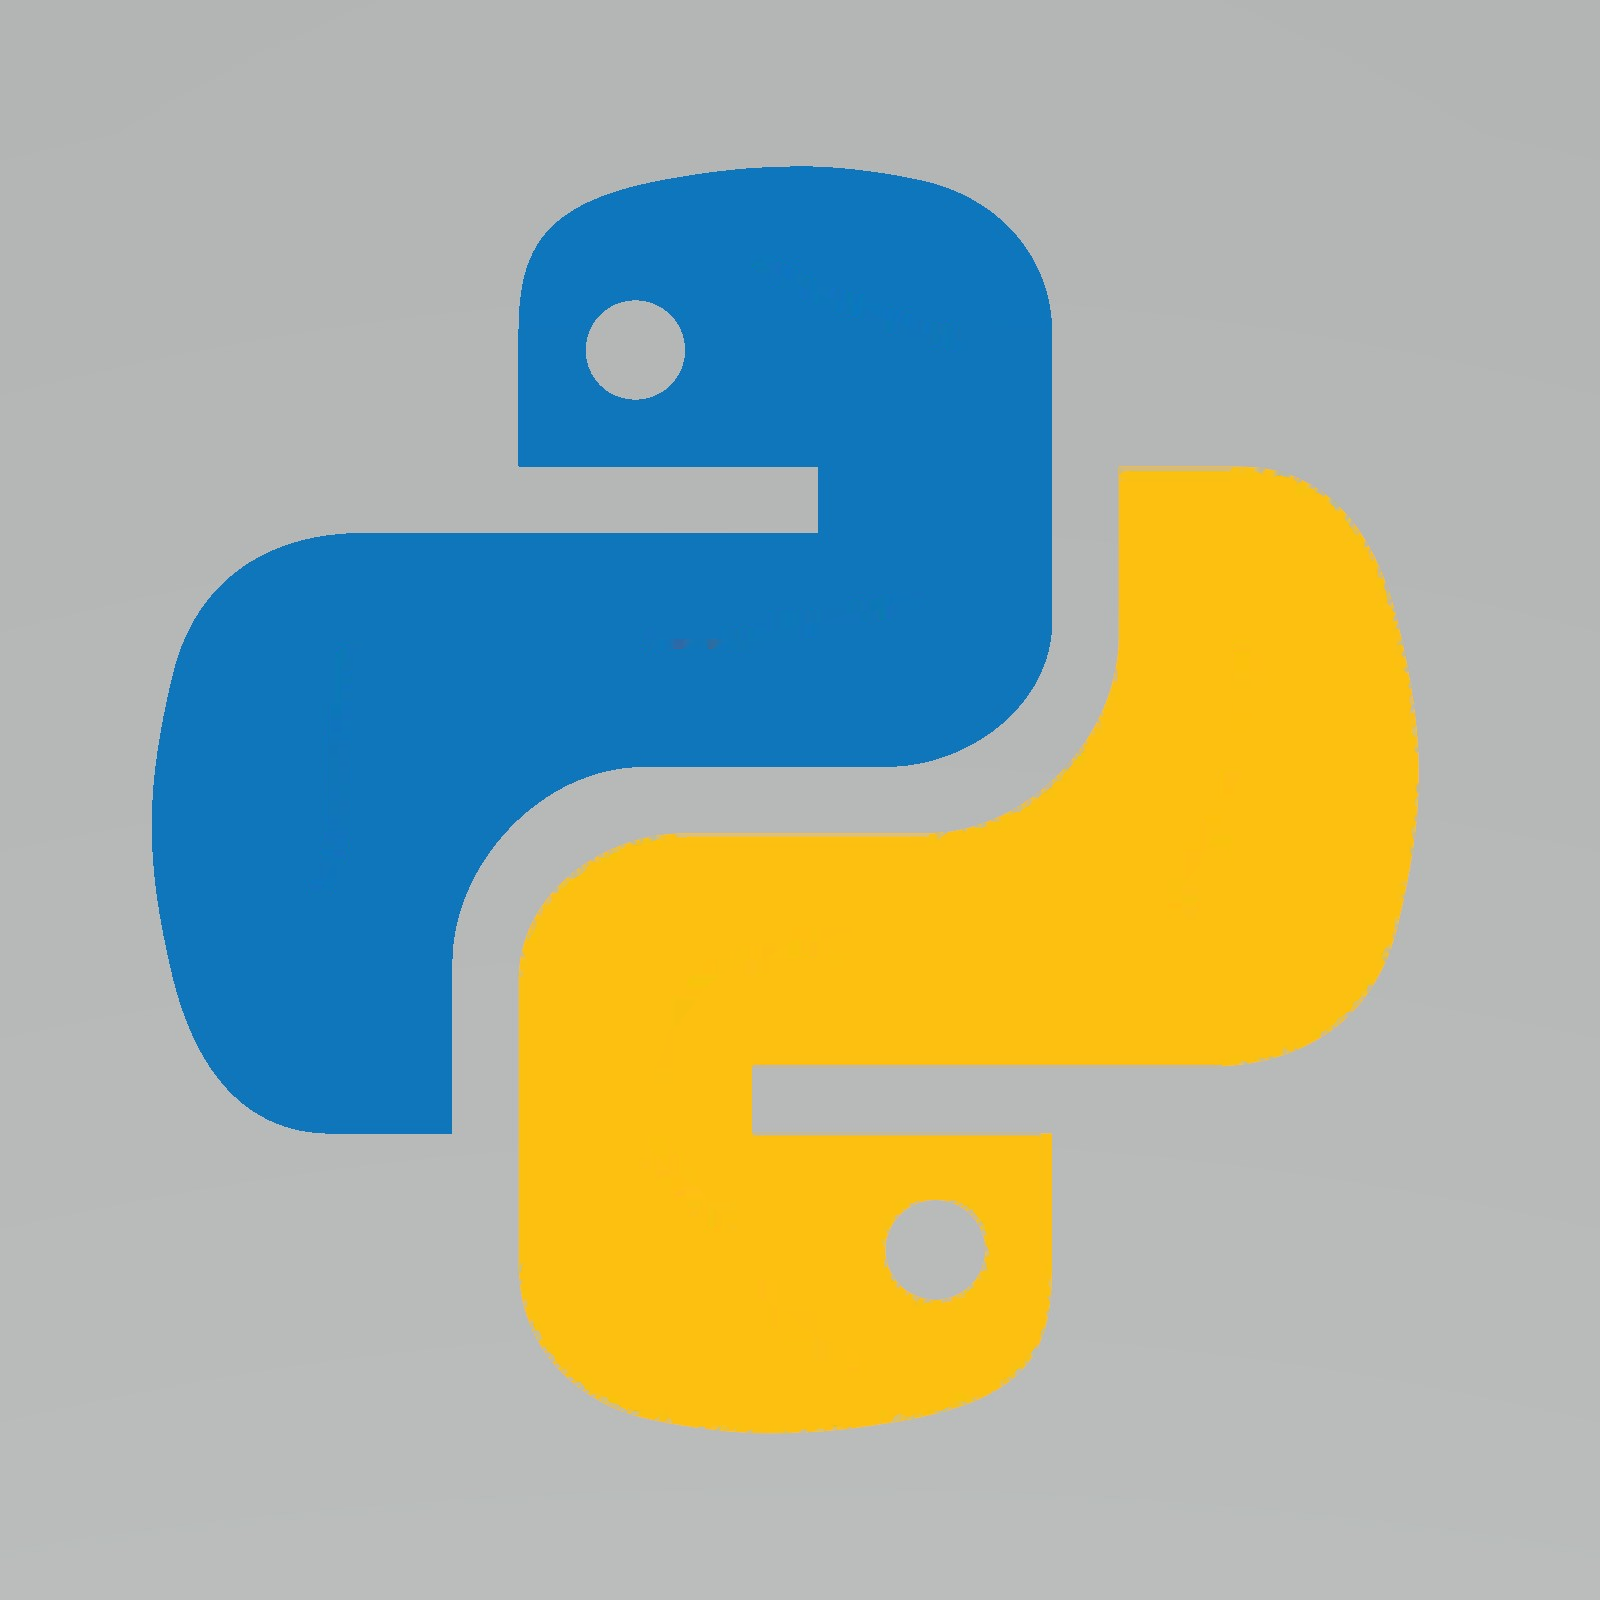

In [17]:
#inpaint to restore image

inpaint_radius = 3

restored = cv2.inpaint(damaged, gray_mask, inpaint_radius, cv2.INPAINT_NS)

cv2_imshow(restored)